In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
df=pd.read_csv("D:\ElectricCarData_Norm (1).csv")
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [11]:
def clean_numeric(value):
    """Removes non-numeric characters and converts to float."""
    return float(str(value).split()[0])  # Extracts only the number before any unit

# Apply cleaning function
df['TopSpeed'] = df['TopSpeed'].apply(clean_numeric)  # Removes 'km/h'
df['Range'] = df['Range'].apply(clean_numeric)        # Removes 'km'
df['Efficiency'] = df['Efficiency'].apply(clean_numeric)  # Removes 'Wh/km'


In [13]:
features = df[['TopSpeed', 'Range', 'Efficiency']]
features = features.dropna()



In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [15]:
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


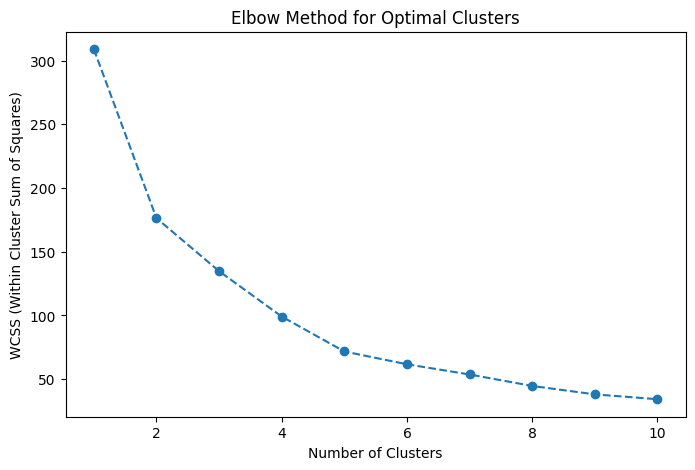

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

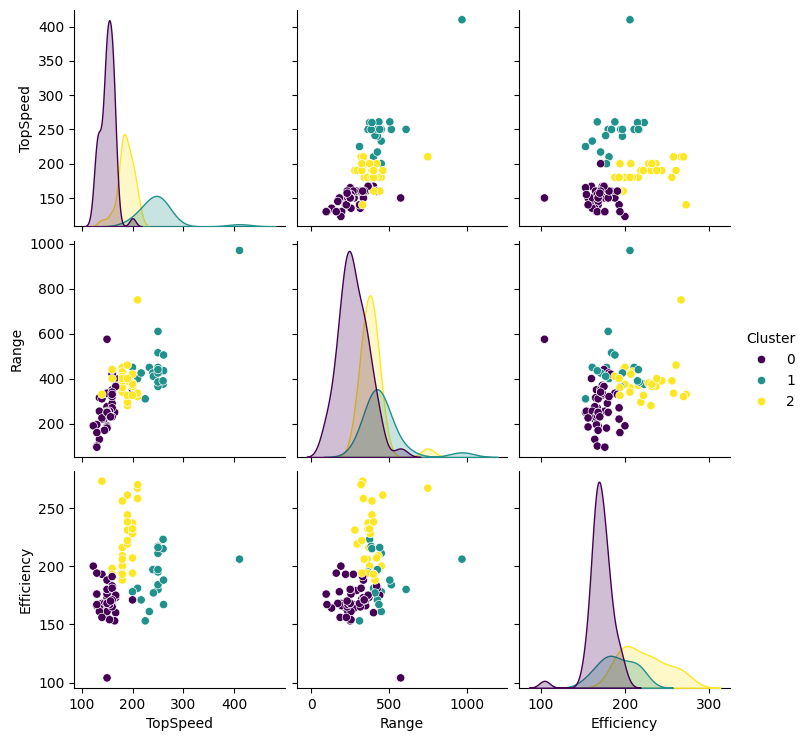

In [18]:
sns.pairplot(df, hue='Cluster', vars=['TopSpeed', 'Range', 'Efficiency'], palette='viridis')
plt.show()


In [19]:
print(df[['TopSpeed', 'Range', 'Efficiency', 'Cluster']].head())

   TopSpeed  Range  Efficiency  Cluster
0     233.0  450.0       161.0        1
1     160.0  270.0       167.0        0
2     210.0  400.0       181.0        1
3     180.0  360.0       206.0        2
4     145.0  170.0       168.0        0


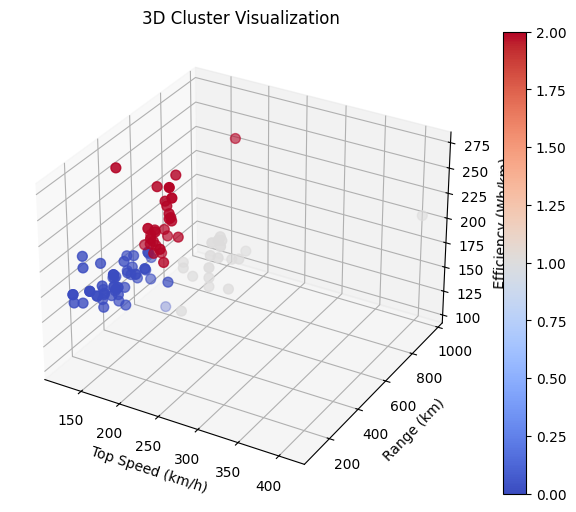

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['TopSpeed'], df['Range'], df['Efficiency'], c=df['Cluster'], cmap='coolwarm', s=50)
ax.set_xlabel("Top Speed (km/h)")
ax.set_ylabel("Range (km)")
ax.set_zlabel("Efficiency (Wh/km)")
plt.title("3D Cluster Visualization")
plt.colorbar(scatter)
plt.show()

C:\Users\sanje\AppData\Local\Temp\ipykernel_34428\3601897265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette="coolwarm")


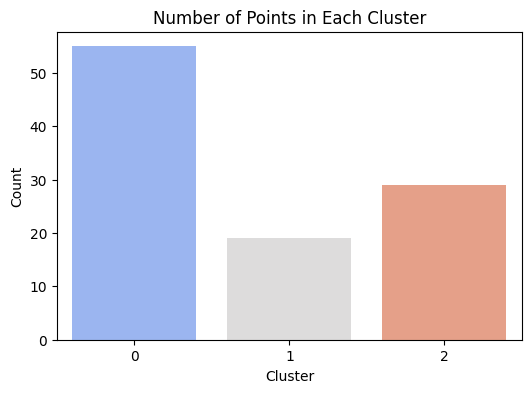

In [21]:
# 📊 Cluster Distribution Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Cluster'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Number of Points in Each Cluster")
plt.show()

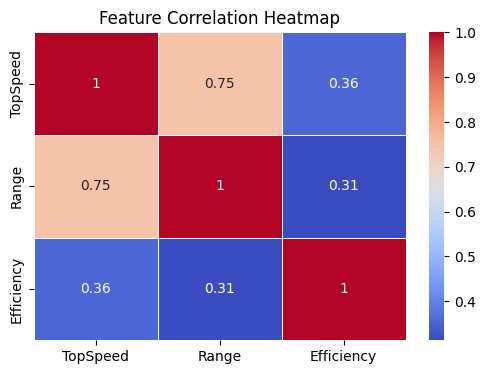

In [22]:
#  Heatmap for Correlation between features
plt.figure(figsize=(6, 4))
sns.heatmap(df[['TopSpeed', 'Range', 'Efficiency']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
